In [21]:
# Importing the Libraries

# Pandas is for data manipulation
import pandas as pd

# Matplotlib is for Visualizing the data, accuracy of our model
from matplotlib import pyplot as plt

# To seperate the data into training data used to train models and testing data used to test models
from sklearn.model_selection import train_test_split

# Os for importing files
import os

# Label encoder is to encode categorical information in the dependent variable
from sklearn.preprocessing import LabelEncoder

# Random Over Samples for resampling the data to ensure balanced results
from imblearn.over_sampling import RandomOverSampler

# Confusion matriz and accuracy score to test the accuracy of our model
from sklearn.metrics import confusion_matrix, accuracy_score

# Joblib to save our model
import joblib

# The classifier which will be the model
import xgboost as xgb

# Importing the csv file
path = os.path.join('Cancer_Data.csv')

# Storing the copy of the csv in the form of a dataframe in the variable 'dataset'
dataset = pd.read_csv(path)

# Dropping the unnecessary columns
dataset = dataset.drop('id', axis='columns')

# Seperating the data into dependent variable and independent variable
x = dataset.iloc[:, 1:31].values
y = dataset.iloc[:, 0].values.reshape(-1, 1)

# Making the Label encoder and encoding the dependent variable
le = LabelEncoder()
y = le.fit_transform(y)

# Making a resampler
ros = RandomOverSampler(random_state=0)

# Resampling the data
x_resampled, y_resampled = ros.fit_resample(x, y)

# Splitting the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=0)

# Making the classifier
xgboost_classifier = xgb.XGBClassifier()

# Training our model
xgboost_classifier.fit(x_train, y_train)

# Getting the predictions of the testing data
y_pred = xgboost_classifier.predict(x_test)

# Making a confusion matrix to see the accuracy of the model by comparing the testing data and the predicted data
cm = confusion_matrix(y_test, y_pred)

# Printing the accuracy of the model
print(f'{(accuracy_score(y_test, y_pred) * 100):.2f}% is the accuracy')

# Printing the confusion matrix
print(cm)


98.14% is the accuracy
[[115   4]
 [  0  96]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# Storing the model for future use
joblib.dump(xgboost_classifier, 'classifier.pk1')

['classifier.pk1']

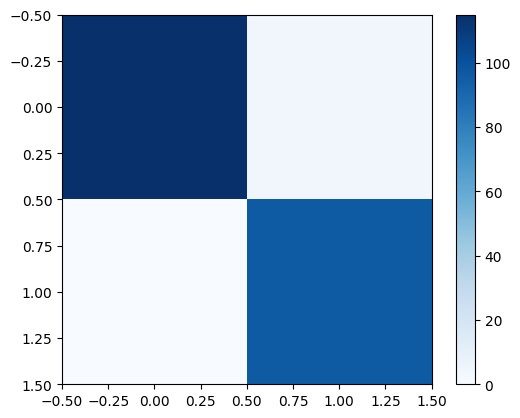

In [23]:
# Visualizing the confusion matrix
plt.imshow(cm, cmap = 'Blues')
plt.colorbar()
plt.show()